Found 232 images belonging to 2 classes.
Found 57 images belonging to 2 classes.


C:\Users\skiri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 662ms/step - accuracy: 0.6535 - loss: 2.9133 - val_accuracy: 0.5965 - val_loss: 0.6869 - learning_rate: 0.0010
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 367ms/step - accuracy: 0.8364 - loss: 1.7451 - val_accuracy: 0.4912 - val_loss: 1.8698 - learning_rate: 0.0010
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - accuracy: 0.8323 - loss: 1.6707 - val_accuracy: 0.5789 - val_loss: 1.5593 - learning_rate: 0.0010
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 400ms/step - accuracy: 0.8682 - loss: 1.0394 - val_accuracy: 0.4912 - val_loss: 5.5094 - learning_rate: 0.0010
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.9002 - loss: 1.1505 - val_accuracy: 0.4912 - val_loss: 4.9254 - learning_rate: 2.0000e-04
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step - accuracy: 0.9146 - loss: 1.3562 - val_accuracy: 0.5439 - val_loss: 3.5394 - learning_rate: 2.0000e-04


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 371ms/step - accuracy: 0.5058 - loss: 3.5489
Validation accuracy: 0.51


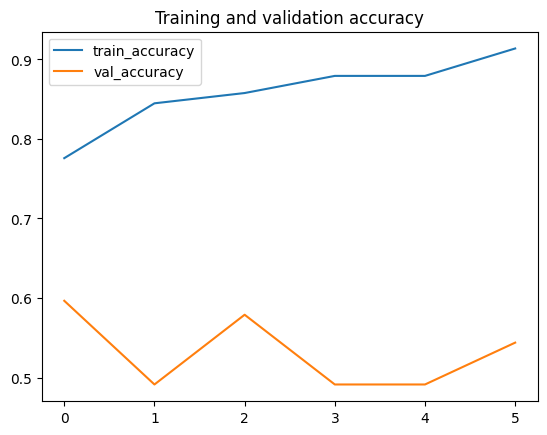

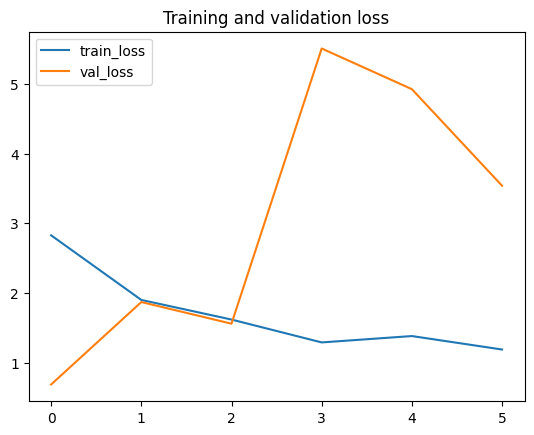

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Set the dataset directory
dataset_dir = r"D:\Mithu tomato\Tomato_Ripeness_detection\dataset"

# Parameters
img_width, img_height = 128, 128
batch_size = 32
epochs = 50
input_shape = (img_width, img_height, 3)

# Data Preprocessing using ImageDataGenerator with Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize the image pixel values to [0, 1]
    validation_split=0.2,  # Reserve 20% of images for validation
    rotation_range=30,  # Rotate images randomly within 30 degrees
    width_shift_range=0.2,  # Horizontal translation
    height_shift_range=0.2,  # Vertical translation
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True  # Flip images horizontally
)

# Load the training set
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification (ripe/unripe)
    subset='training'
)

# Load the validation set
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Build the CNN model
model = Sequential()

# First convolutional layer with Batch Normalization
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(BatchNormalization())  # Normalize after Conv
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with Batch Normalization
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with Batch Normalization
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the results to feed into a fully connected (dense) layer
model.add(Flatten())

# Fully connected layer with Dropout to prevent overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping, model checkpointing, and learning rate reduction
checkpoint = ModelCheckpoint('tomato_ripeness_model.keras', monitor='val_loss', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Save the final model as .h5
model.save('tomato_ripeness_final_model.h5')

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc:.2f}")

# Plot the training and validation accuracy/loss
# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


#Improvements Applied:

Data Augmentation: Helps generalize better with transformations like rotations, zoom, and flips.
Batch Normalization: Added after each convolutional layer to help stabilize and speed up training.
Learning Rate Scheduling: Reduces learning rate if the model’s validation loss plateaus to avoid overshooting.
Real-time Integration: You can now classify tomatoes as ripe or unripe in real-time using your webcam.

In [3]:
# Print accuracy as a percentage
print(f"Validation accuracy: {val_acc * 100:.2f}%")

Validation accuracy: 50.88%
